In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset

In [3]:
data=pd.read_csv(r"H:\C\user\Downloads\car_age_price.csv")

In [4]:
data.head()


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
# check for column names
data.columns

Index(['Year', 'Price'], dtype='object')

In [6]:
#check datatypes
data.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
#check shape
data.shape

(112, 2)

In [8]:
# check informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [10]:
# check for unique values
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [11]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [12]:
#check for null values
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [13]:
#no null values then check for outliers

In [14]:
#check for outliers using boxplot

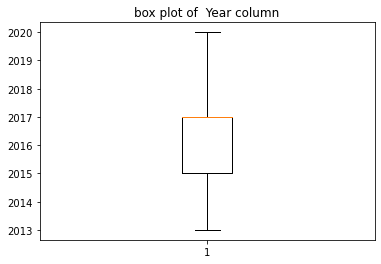

In [15]:
plt.boxplot(data['Year'])
plt.title('box plot of  Year column')
plt.show()

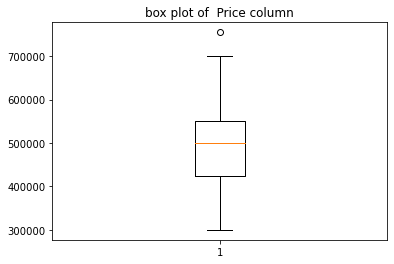

In [16]:
plt.boxplot(data['Price'])
plt.title('box plot of  Price column')
plt.show()

In [17]:
#finding outliers in price column

In [18]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')


In [19]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [20]:
IQR=Q3-Q1

In [21]:
print(IQR)

127500.0


In [22]:
low_lim=Q1-1.5*IQR

up_lim=Q3+1.5*IQR

In [23]:
print(low_lim)
print(up_lim)


231250.0
741250.0


In [24]:
outlier=[]
for x in data['Price']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [25]:
len(outlier)

1

In [26]:
outlier

[755000]

In [27]:
ind=data['Price']>up_lim

In [28]:
data.loc[ind].index

Int64Index([1], dtype='int64')

# 1.Find the best linear relationship between year and price. 

In [29]:
x=data['Year']
y=data['Price']

In [30]:
m,b=np.polyfit(x,y,1)   #m=slope,b=intercept


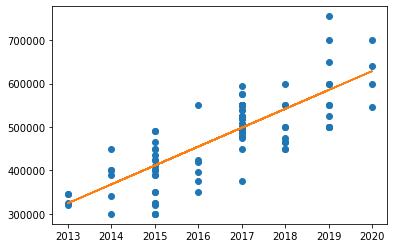

In [31]:
#create scatter plot
plt.plot(x,y,'o')
#create line of fit
plt.plot(x,m*x+b)

In [32]:
print('value of m =',m)
print('value of b = ',b)

value of m = 43453.379887929186
value of b =  -87147246.05488305


# predicting value in 2022 from best line of fit

In [33]:
x=2022

In [34]:
y=m*x+b

In [35]:
print('predicted value in 2022 from best line of fit',y)

predicted value in 2022 from best line of fit 715488.0785097629


## Please learn about lasso regression and create a model along with linear regression.find out which one is performing better

In [36]:
#correlation  with price and year

<AxesSubplot:>

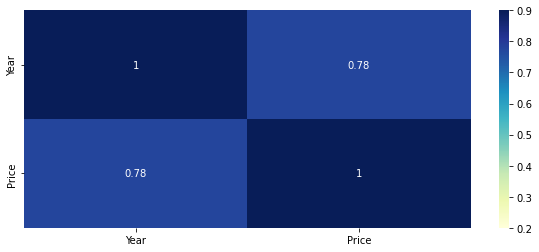

In [37]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap= 'YlGnBu')

In [38]:
#taking price as target and year as feature

In [39]:
X = data.drop('Price',axis=1)
y=data['Price']


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# lasso regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)

In [44]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 4326906210.343814
  Columns  Coefficient Estimate
0    Year          47608.567396


In [45]:
#lasso prediction in 2022

In [46]:
y_pred1=lasso.predict([[2022]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [47]:
print('lasso prediction value of 2022 model ',y_pred1)

lasso prediction value of 2022 model  [743601.61370337]


# linear regression

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean aquare error is :',mean_squared_error(y_test,predictions))
print('R squared value is : ',r2_score(y_test,predictions))
      

Mean aquare error is : 4326906256.829671
R squared value is :  0.36759313425902185


In [50]:
#predict the price in 2022 using linear regression

In [51]:
prediction=model.predict([[2022]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
print('linear regression prediction value of 2022  model',prediction)

linear regression prediction value of 2022  model [743601.61594504]


# predicted values

predicted value of 2022 model  from best line of fit 715488.0785097629

lasso prediction value of 2022 model 743601.61370337

linear regression prediction value of 2022 model is  743601.61594504

# MSE values in lasso and linear regression

 Mean squared error  in the data set using lasso regression  4326906210.343814

Mean aquare error in the data set using linear regression  4326906256.829671

lasso is the modified form of linear regression ,MSE values of lasso is slight less than MSE values in linear regression

# so lasso model is predicting better than linear model